<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [124]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [125]:
# Answer:
#movies.shape
print('Number of rows: ', movies.shape[0])
print('Number of columns: ', movies.shape[1])

Number of rows:  979
Number of columns:  6


#### Check the data type of each column.

In [126]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [127]:
# Answer:
print('Average movie duration: ', movies['duration'].mean())

Average movie duration:  120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [128]:
movies.loc[(movies['duration']==movies['duration'].max()) | (movies['duration']==movies['duration'].min()),:]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [129]:
# Answer:
movies.sort_values(by=['duration'])

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

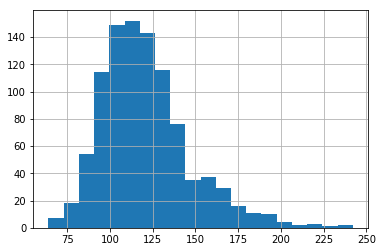

In [130]:
# Answer:
movies['duration'].hist(bins=20)

#### Use a box plot to display that same data.

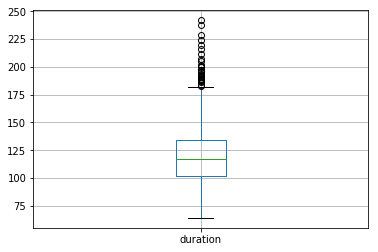

In [131]:
# Answer:
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [132]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'No. of movies')

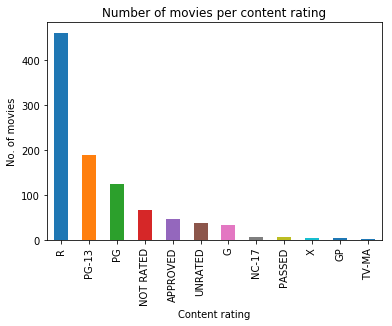

In [133]:
# Answer:
plt.figure()
movies['content_rating'].value_counts().plot(kind='bar', title='Number of movies per content rating')
plt.xlabel('Content rating')
plt.ylabel('No. of movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [134]:
# Answer:
movies.loc[movies['content_rating'].isin(['NOT RATED','APPROVED','PASSED','GP']),'content_rating']= 'UNRATED'
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [135]:
# Answer:
movies.loc[movies['content_rating'].isin(['X','TV-MA']),'content_rating']= 'NC-17'
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [136]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [137]:
# Answer:
movies.loc[movies['content_rating'].isnull(), 'content_rating']

187    NaN
649    NaN
936    NaN
Name: content_rating, dtype: object

In [138]:
movies.loc[movies['content_rating'].isnull(), 'content_rating'] = 'UNRATED'
#movies.isnull().sum()

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [139]:
# Answer:
movies.loc[movies['duration'] >= 120,'star_rating'].mean()

7.948898678414082

In [140]:
movies.loc[movies['duration'] < 120,'star_rating'].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

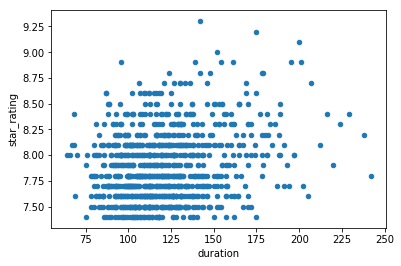

In [141]:
# Answer:
#drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')
movies.plot(kind='scatter', x='duration', y='star_rating')

In [142]:
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [143]:
# Answer:
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

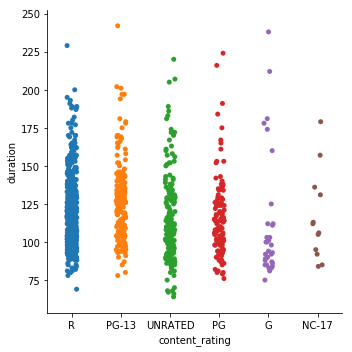

In [144]:
# Answer:
import seaborn as sns
sns.catplot(x="content_rating", y="duration", data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [145]:
# Answer:
movies[['star_rating','title','genre']].groupby('genre').max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [146]:
# Answer:
movies['title'].duplicated().value_counts()

False    975
True       4
Name: title, dtype: int64

In [147]:
import numpy as np

In [148]:
duplicated_list = np.array(movies.loc[movies['title'].duplicated(),'title'])
duplicated_list

array(['The Girl with the Dragon Tattoo', 'Dracula', 'Les Miserables',
       'True Grit'], dtype=object)

In [149]:
movies.loc[movies['title'].isin(duplicated_list),:]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [150]:
list_genre = movies['genre'].value_counts()
final_list = list_genre[list_genre >= 10].index.tolist()
movies[movies['genre'].isin(final_list)][['star_rating','genre']].groupby('genre').mean()
#movies[['star_rating','genre']].groupby('genre').mean()
#movies.loc[movies['genre'].value_counts() >= 10, 'star_rating']

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 1: manually create a list of relevant genres, then filter using that list

In [151]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [152]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [153]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [154]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [72]:
#movies['total_actors'] = movies[:,'actors_list'].count()
#type(movies.loc[1,'actors_list'])
#import ast
#mylist = ast.literal_eval(movies.loc[0,'actors_list'])
#mylist

['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']

In [155]:
import ast 
def str_to_list_func(in_str):
    return ast.literal_eval(in_str)

def length_list(ls):
    return len(ls)

In [156]:
movies['actors_list'] = movies['actors_list'].apply(str_to_list_func)

In [1]:
movies.actors_list.dtype

NameError: name 'movies' is not defined

In [158]:
movies['total_actor'] = movies['actors_list'].apply(length_list)

In [159]:
movies

,star_rating,title,content_rating,genre,duration,actors_list,total_actor
0,9.3,The Shawshank Redemption,R,Crime,142,"[Tim Robbins, Morgan Freeman, Bob Gunton]",3
1,9.2,The Godfather,R,Crime,175,"[Marlon Brando, Al Pacino, James Caan]",3
2,9.1,The Godfather: Part II,R,Crime,200,"[Al Pacino, Robert De Niro, Robert Duvall]",3
3,9.0,The Dark Knight,PG-13,Action,152,"[Christian Bale, Heath Ledger, Aaron Eckhart]",3
4,8.9,Pulp Fiction,R,Crime,154,"[John Travolta, Uma Thurman, Samuel L. Jackson]",3
5,8.9,12 Angry Men,UNRATED,Drama,96,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",3
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[Clint Eastwood, Eli Wallach, Lee Van Cleef]",3
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[Elijah Wood, Viggo Mortensen, Ian McKellen]",3
8,8.9,Schindler's List,R,Biography,195,"[Liam Neeson, Ralph Fiennes, Ben Kingsley]",3
9,8.9,Fight Club,R,Drama,139,"[Brad Pitt, Edward Norton, Helena Bonham Carter]",3
